# Summer Analytics 2022
# WEEK-2 Graded Assignment: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and work out ungraded assisgnment ,completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

In [28]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Iris species of a flower is one of the most popular datasets for machine learning. This dataset is primarily for classification, but here we will use same dataset with some changes so that we can use it for Linear Regression. Let's load the dataset first.

In [29]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [30]:
# ok so it has feature_names & target attributes
print(iris.feature_names)
print(iris.target)
# iris

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with  some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id, 
Sepal Length Cm, 
Sepal Width Cm,,
Petal Length Cm, 
Petal Width Cm, 
Species. Let's see some of the first rows of the datasets after loading it from sklearn.

In [31]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
# iris_data.head()

We can now rename column name to make it more standard for ease of coding and readability.

In [32]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace=True)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
iris_data.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [34]:
a=[1, 2, 3, 4]
for item in a:
    item=10   # this won't update the a.
a

# iris_data.target=10
# iris_data.head()   # got updated obv.

[1, 2, 3, 4]

Add a new column named "species" having value {if target == 0 : 'setosa' ,
if target ==1 : 'versicolor',
if target == 2 : 'virginica' }

In [35]:
#your code here
# iris_data['species']={iris_data.target==0: 'setosa', iris_data.target==1: 'versicolor', iris_data.target==2: 'virginica'}
# iris_data['species']= 'setosa' if iris_data.target==0 else 'versicolor' if iris_data.target==1 else 'virginica' if iris_data.target==2

iris_data['species']= "NaN"
for i, j in iris_data.iterrows():
    if(j.target==0):
        # j.species= 'setosa'
        iris_data['species'][i]= 'setosa'
#         iris_data.loc[:, ('species', i)]= 'setosa'    ## v/s ?
    elif(j.target==1):
        iris_data['species'][i]= 'versicolor' 
    elif(j.target==2):
        iris_data['species'][i]= 'virginica'
iris_data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,target,species
140,6.7,3.1,5.6,2.4,2,virginica
141,6.9,3.1,5.1,2.3,2,virginica
142,5.8,2.7,5.1,1.9,2,virginica
143,6.8,3.2,5.9,2.3,2,virginica
144,6.7,3.3,5.7,2.5,2,virginica
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


we will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.


In [36]:
#your code here
data = pd.DataFrame(columns=iris_data.columns)  # empty df with columns
print(data)
# data.columns= iris_data.columns
# data.insert()

for i,j in iris_data.iterrows():
    if(j.target==1):
        # data.append(j)
        data.loc[len(data.index)]= j    # adding rows
data.head()

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target, species]
Index: []


,sepal_length,sepal_width,petal_length,petal_width,target,species
0,7.0,3.2,4.7,1.4,1,versicolor
1,6.4,3.2,4.5,1.5,1,versicolor
2,6.9,3.1,4.9,1.5,1,versicolor
3,5.5,2.3,4.0,1.3,1,versicolor
4,6.5,2.8,4.6,1.5,1,versicolor


Now we are droping  all the columns except petal_length and petal_width 

In [37]:
data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)
data.head()

,petal_length,petal_width
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5


Now write code to print the shape of DataFrame named as data.

In [38]:
#your code here
data.shape

(50, 2)

Now  plot the Dataframe named data having x axis as 'petal_length', y axis as 'petal_width' and kind='scatter' 

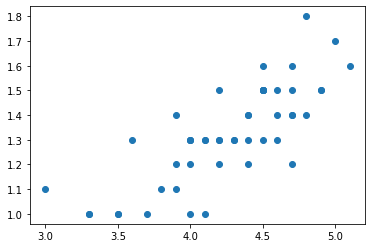

In [39]:
#your code here
# data.plot()

# plt.plot('petal_length', 'petal_width', data=data)
plt.scatter('petal_length', 'petal_width', data=data)
plt.show()

# kind='scatter'   ??

In [40]:
data.shape

(50, 2)

Now let's start with Linear Regression

We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)

In [41]:
# split ke liye bhi default function
from sklearn.model_selection import train_test_split
X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)
print(X.shape, Y.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)  # random_state?


(50, 1) (50, 1)


Now let's plot the training  datasets of  kind scatter with x axis as X_train and y axis as Y_train.

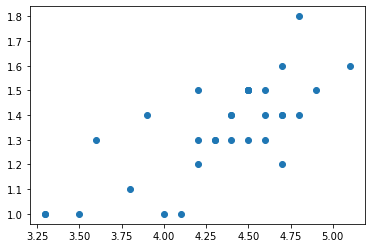

In [42]:
#your code here for plotting training dataset
plt.scatter(X_train, Y_train)
plt.show()

# kafi kam nhi hai train set?

Now let's plot the test datasets of kind scatter with x axis as X_test and y axis as Y_test

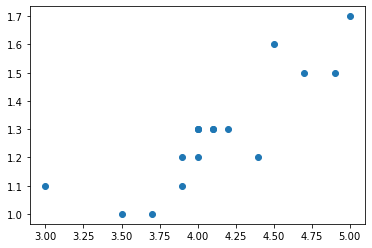

In [43]:
#your code here for plotting test dataset
plt.scatter(X_test, Y_test)
plt.show()

Now write the code for LinearRegession using sklearn.

In [44]:
from sklearn.linear_model import LinearRegression
#your code here
lr = LinearRegression()
lr.fit(X_train, Y_train)

# DOUBT: bas lr.fit se hi train ho jata hai?

LinearRegression()

Now print the Intercept and Coefficient.

In [45]:
#your code here
print(lr.coef_, lr.intercept_)
slope= lr.coef_[0]
c= lr.intercept_

[[0.3338594]] [-0.10228121]


Now we can overlay the predicted line and test data points to see where the predicted point lies.

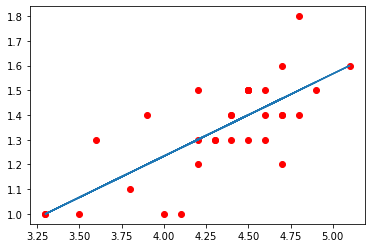

In [46]:
# wrt train data 
plt.plot(X_train, Y_train, 'ro')

train_pred= slope * X_train + c
plt.plot(X_train, train_pred)
plt.show()

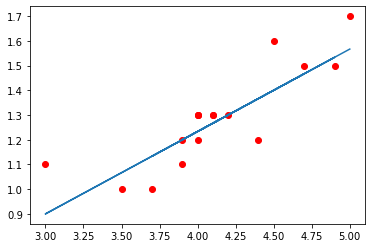

In [47]:
# wrt test data
plt.plot(X_test, Y_test, 'ro')

test_pred= slope * X_test + c
plt.plot(X_test, test_pred)

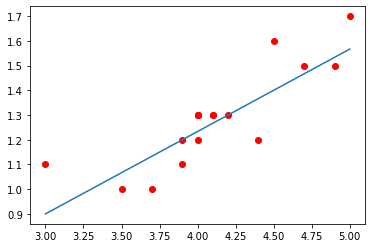

In [48]:
# rough - using np.linspace
# plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test, 'ro')

# X=[X_train.min(), X_train.max()]
# Y=[Y_train.min(), Y_train.max()]
# X=[0, -c/slope]
# Y=[c, 0]
# plt.plot(X, Y)
# plt.plot(X, Y)

inp = np.linspace(X_test.min(), X_test.max(), num=17)
# print(inp)  # will be diff than X_test obv., but sometimes easier to plot line using this.

pred = slope * inp + c
plt.plot(inp, pred)  # same as earlier

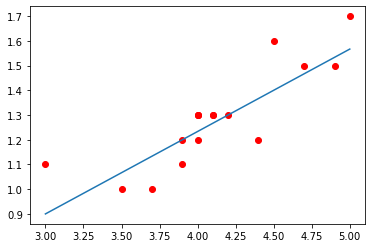

In [49]:
# another meth
plt.plot(X_test, Y_test, 'ro')

inp=[X_test.min(), X_test.max()]
# Y=[Y_test.min(), Y_test.max()]
pred= slope * inp + c
# pred= slope * Y + c
plt.plot(inp, pred)
# plt.plot(inp, Y)   # wrong :)

# woah.. best. just predicts output for min & max input, & plots the line using two point

This is end of assisgnment , but for futhur reading you can search articles on 
Lasso Regression, Multivariate Regression , ElasticNet regression, Ridge Regression, Stepwise Regression.